Welcome!
What do you want to do? 
1-Accuracy & Prediction
2-Data Visualization Diagrams
3-Exit
1
Please select the algorithm you'd want to implement.
1-Regression	2-Decision Tree 	3-Naive Bayes 	4-KNN 	5-Neural Network 	6-K-Means Clustering
6
----- K-Means ----- 


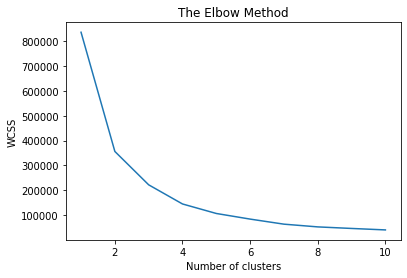

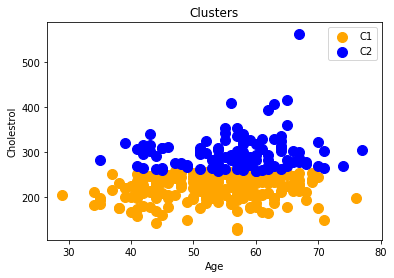

What do you want to do? 
1-Accuracy & Prediction
2-Data Visualization Diagrams
3-Exit
3


<Figure size 432x288 with 0 Axes>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

dataset = pd.read_csv('heart.csv')
print("Welcome!")

while True:
    print("What do you want to do? \n1-Accuracy & Prediction\n2-Data Visualization Diagrams\n3-Exit");
    func=int(input());
    if(func==1):
        print("Please select the algorithm you'd want to implement.")
        print("1-Regression\t2-Decision Tree \t3-Naive Bayes \t4-KNN \t5-Neural Network \t6-K-Means Clustering");
        choice=int(input());
        
        if(choice==1):
            print("----- Regression -----");
            print("Regression:");
            
            #Giving user options to select column for variable X.
            print("Please enter the number of x you want to select(1-5):");
            print("1- Age")
            print("2- Resting blood pressure");
            print("3- Cholesterol");
            print("4- Maximum heart rate (thalach)");
            print("5- ST depression (oldpeak)")
            
            #Saving input
            temp=input('Enter your choice for X: ');
            
            #this variable will have column name as in csv file.
            inputa=''
            
            #this variable will have name understandable by user.
            inputname=''
            
            #Assigning value depending on user input.
            if (temp=='1'):
                inputa='age'
                inputname='Age'
            elif(temp=='2'):
                inputa='trestbps'
                inputname='Resting BP'
            elif(temp=='3'):
                inputa='chol'
                inputname='Cholesterol'
            elif(temp=='4'):
                inputa='thalach'
                inputname='Max Heart Rate'
            elif(temp=='5'):
                inputa='oldpeak'
                inputname='ST Depression'
                
            #Reshaping x and y array so that it can be passed to split function    
            x=dataset[inputa].values.reshape(-1,1)
            
            #Target variable will be our final Y variable
            y=dataset['target'].values.reshape(-1,1)
            
            #Splitting training and testing data. Training size=75%, Testing size=25%
            XTrain, XTest, YTrain, YTest = train_test_split(x,y,test_size=0.25,random_state=20)
            
            #Initializing linear regression object (Constructor Calling).
            regressor = LinearRegression()
            
            #Training regression model.
            regressor.fit(XTrain, YTrain)
            print('----------Results------------')
            
            #Intercept value shows the value of predicted Y if X will be 0.
            print("Intercept value = ",regressor.intercept_)
            
            #Co-efficient value shows the value that is multiplied to X-value to make Y-value.
            print("Coefficient = ",regressor.coef_)
            
            #Predicting values of Y.
            YPredict = regressor.predict(XTest)
            
            #Rounding off Y values.
            YPredict=np.round_(YPredict, decimals = 0, out = None)
            
            #Accuracy of model
            print("Accuracy of Regression: ",metrics.accuracy_score(YTest,YPredict)*100,"%")
            
            #Inserting original and predicted values in a dataframe to compare both.
            TempDS=pd.DataFrame({inputname+'': XTest.flatten(), 'Actual Value':YTest.flatten(),'Predicted Value' : YPredict.flatten()})
            
            #Showing top 10 values.
            print(TempDS.head(10))
            
        elif(choice==2):
            print("----- Decision Tree -----")
            dataset=dataset.fillna(0)
            feature_cols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exan','oldpeak','slope','ca','thal']
            X = dataset.iloc[:, [0, 12]].values  # [Independent Variables]
            Y = dataset.target #  [Dependent Varible]

            # Splitting the dataset into the Training set and Test set
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

            # Fitting Decision Tree Classification to the Training set
            classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
            classifier.fit(X_train, y_train)

            # Predicting the Test set results
            y_pred = classifier.predict(X_test)
            print(y_pred)

            #Accuracy
            print("Accuracy of decision tree classifier: ",metrics.accuracy_score(y_test,y_pred)*100,"%")

            # Making the Confusion Matrix
            cm = confusion_matrix(y_test, y_pred)
            print("The confusion matrix for decision tree is: ")
            seabornInstance.heatmap(cm, annot=True)
    
            #Plotting the decision tree
            plt.show()
            classes_name=[str(i) for i in dataset.target]
            fig=plt.figure(figsize=(100,90))
            _ = tree.plot_tree(classifier,
                               feature_names=feature_cols, rounded=True,
                               class_names=classes_name, filled=True)
            plt.savefig("DTree_heart.png")
            
        elif(choice==3):
            print("----- Naive Bayes -----");
            dataset=dataset.fillna(0)
            X_train=pd.get_dummies(dataset[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']])
            y_train=pd.DataFrame(dataset[['target']])

            # Naive Bayes Model
            model=GaussianNB()
            model.fit(X_train,y_train)
            predict =model.predict([[7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0,1]])
            
            #splitting
            X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)
            
            #Predicting Value
            print (predict)
            y_pred=model.predict(X_train)
            print(y_pred)

            #Accuracy
            print("Accuracy of Naive Bayes: ",metrics.accuracy_score(y_train,y_pred)*100,"%")

            #Confusion Matrix
            cm1=metrics.confusion_matrix(y_train,y_pred)
            print(cm1)
            print("Confusion matrix for Naive Bayes")
            seabornInstance.heatmap(cm1,annot=True)            
              
            #classification Report for Naive Bayes
            print("----- Classification Report for Naive Bayes -----")
            print(classification_report(y_train, y_pred))
            
        elif(choice==4):
            print("----- KNN -----");
            
            #Assgining columns to train and predict
            X_train=pd.get_dummies(dataset[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']])
            y_train=pd.DataFrame(dataset[['target']])

            #splitting to train 
            X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.25,random_state=1)
            
            classifier=KNeighborsClassifier(n_neighbors=5)
            classifier.fit(X_train,y_train)
            y_pred=classifier.predict(X_test)
            
            #accuracy
            print("Accuracy of KNN:" ,metrics.accuracy_score(y_test,y_pred)*100,"%")
            
            #prediction added
            predicted=classifier.predict(X_train)
            print("Predicted: ",predicted)
            
            #Confusion Matrix added
            print("----- Confusion Matrix for KNN ------")
            cm2=metrics.confusion_matrix(y_test, y_pred)
            seabornInstance.heatmap(cm2, annot=True)
            
            #classification Report for KNN
            print("------Classification Report for KNN -----")
            print(classification_report(y_test, y_pred))
            
        elif(choice==5):
            print("----- Neural network -----");
            class NeuralNetworks():
                def __init__(self):
                    np.random.seed(1)
                    
                    #Generating random synatpic weights
                    self.synaptic_weights =2* np.random.random((5,1))-1
                    
                #Getting signoid value
                def signoid(self,x):
                    return 1/(1+np.exp(-x))
                
                #Calculating derivative of signoid value.
                def signoid_derivative(self,x):
                    return x*(1-x)
                
                #Training synaptic weights to get the improved version.
                def train(self,training_inputs,training_outputs,training_iterations):
                    for iteration in range(training_iterations):
                        output=self.think(training_inputs)
                        error=training_outputs - output
                        adjustments=np.dot(training_inputs.T,error*self.signoid_derivative(output))
                        self.synaptic_weights +=adjustments
                        
                #Predicting target value on the basis of inputs, using weights.
                def think(self,inputs):
                    inputs=inputs.astype(float)
                    output=self.signoid(np.dot(inputs,self.synaptic_weights))
                    return output
            if __name__ == "__main__":
                #Initializing neural network object.
                neural_network=NeuralNetworks()
                print("Randomly generated weights")
                print(neural_network.synaptic_weights)
                
                #Defining inputs and output for prediction.
                training_inputs=pd.get_dummies(dataset[['age','trestbps','chol','thalach','oldpeak']])
                training_outputs=pd.DataFrame(dataset['target'])
                
                #Training neural network
                neural_network.train(training_inputs,training_outputs,10000)
                
                #Checking the affect to synaptic weights after training
                print("Synaptic weights after training");
                print(neural_network.synaptic_weights)
                
                #Taking user inputs for prediction
                a1=input("Enter age ");
                a2=input("Enter resting blood pressure value(90-180) = ");
                a3=input("Enter cholesterol value(150-600) = ");
                a4=input("Enter maximum heart rate value(100-200) = ");
                a5=input("Enter ST depression value(0.0-4.0) = ");
                
                #Predicting final value based on given inputs
                a=neural_network.think(np.array([a1,a2,a3,a4,a5]))
                if(a==1):
                    print("There is strong prediction of heart attack")
                else:
                    print("No visible chances of heart attack") 
                    
        elif(choice==6):
            print("----- K-Means ----- ");
            x=dataset.iloc[:, [0, 4]].values  #Age, cholestrol
            wcss = [] # sum of squares of the distances of each data point in all clusters to their respective centroids
            for i in range (1,11):
                kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
                kmeans.fit(x)
                wcss.append(kmeans.inertia_)
                
            #making graph for elbow method
            plt.plot(range(1,11), wcss)
            plt.title('The Elbow Method')
            plt.xlabel('Number of clusters')
            plt.ylabel('WCSS')
            plt.show()
            plt.savefig("Elbow.png")
            
            #n_clusters is decided by the graph shown after elbow method
            kmeans = KMeans(n_clusters = 2 , init = 'k-means++', random_state= 42)
            y_kmeans= kmeans.fit_predict(x)
            plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s= 100, c= 'orange', label= 'C1' )
            plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s= 100, c= 'blue', label= 'C2')
#             plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s= 100, c= 'orange', label= 'C3')
#             plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3,1], s= 100, c= 'red', label= 'C4')
            plt.title('Clusters')
            plt.xlabel('Age')
            plt.ylabel('Cholestrol')
            plt.legend()
            plt.show()
            plt.savefig("KMeans_heart.png")
           
        else:
            print("Invalid option provided for algorithm selection");
            
    elif(func==2):
        print("Please select the diagram you want to create.")
        print("1- Scatter plot b/w two variables")
        print("2- Bar Graph")
        print("3- Boxplot ")
        print("4- Correlation Matrix")
        print("5- KDE plot")
        print("6- Count plot")
        ans=int(input());
        
        if(ans==1):
            print("----- Scatter plot -----")
            print("Please enter the number for selecting X (1-5):");
            print("1- Age")
            print("2- Resting blood pressure");
            print("3- Cholesterol");
            print("4- Maximum heart rate (thalach)");
            print("5- ST depression (oldpeak)")
            print("6- Target")
            
            #Saving input
            temp=input('Enter your choice for X: ');
            #this variable will have column name as in csv file.
            inputa=''
            #this variable will have name understandable by user.
            inputname=''
            #Assigning x-value depending on user input.
            if (temp=='1'):
                inputa='age'
                inputname='Age'
            elif(temp=='2'):
                inputa='trestbps'
                inputname='Resting BP'
            elif(temp=='3'):
                inputa='chol'
                inputname='Cholesterol'
            elif(temp=='4'):
                inputa='thalach'
                inputname='Max Heart Rate'
            elif(temp=='5'):
                inputa='oldpeak'
                inputname='ST Depression'
            elif(temp=='6'):
                inputa='target'
                inputname='Target'
            ytemp=input('Enter your choice for Y: ');
            #this variable will have column name as in csv file.
            yval=''
            #this variable will have name understandable by user.
            yvalname=''
            #Assigning y-value depending on user input.
            if (ytemp=='1'):
                yval='age'
                yvalname='Age'
            elif(ytemp=='2'):
                yval='trestbps'
                yvalname='Resting BP'
            elif(ytemp=='3'):
                yval='chol'
                yvalname='Cholesterol'
            elif(ytemp=='4'):
                yval='thalach'
                yvalname='Max Heart Rate'
            elif(ytemp=='5'):
                yval='oldpeak'
                yvalname='ST Depression'
            elif(ytemp=='6'):
                yval='target'
                yvalname='Target'
            #Plotting x and y values on graph
            dataset.plot(x=inputa, y=yval, style='o')
            #labeling the graph
            xv=str(inputname+' vs '+yvalname)
            plt.title(xv)
            plt.xlabel(inputname)
            plt.ylabel(yvalname)
            plt.show()
            
        elif(ans==2):
            print("----- Bar graph -----");
            x_train=pd.get_dummies(dataset[['age','chol','trestbps','thalach']])
            y_train=pd.DataFrame(dataset[['target']])
            x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.25,random_state=1)
            classifier=KNeighborsClassifier(n_neighbors=5)
            classifier.fit(x_train,np.ravel(y_train,order='C'))
            y_pred=classifier.predict(x_test)
            le = preprocessing.LabelEncoder()
            y_test = le.fit_transform(y_test)
            y_pred = le.fit_transform(y_pred)
            df=pd.DataFrame({'Actual':y_test.flatten(),'Predict':y_pred.flatten()})
            df.plot(kind='bar',figsize=(16,5))
            plt.grid(which='major',linestyle='-',linewidth='0.5',color='Blue')
            plt.grid(which='minor',linestyle='-',linewidth='0.5',color='black')
            plt.show()
            
        elif(ans==3):
            print("----- Boxplot -----");
            dataset=dataset.fillna(0)
            print(dataset['target'].value_counts())
            print(dataset.boxplot(column='target'))
            dataset.boxplot(by ='fbs', column =['target'], grid = False) 
            plt.show()
            
        elif(ans==4):
            print("----- Correlation Matrix -----")
            plt.style.use("ggplot")
            plt.figure(figsize=(13,10))
            seabornInstance.heatmap(dataset.corr(),annot=True,fmt=".0%",cmap="viridis")
            plt.title("Correlation Matrix",fontsize=20)
            plt.savefig("CorrelationMatrix.png")
            plt.show()
            
        elif(ans==5):
            print("----- KDE Plot -----")
            print("Which variable you want to see? \n (age,chol,thalach,oldpeak) ")
            col=input(">> ")
            plt.figure(figsize=(8,6))
            seabornInstance.kdeplot(dataset.loc[dataset["target"]==1][col],color="green",shade=True)
            seabornInstance.kdeplot(dataset.loc[dataset["target"]==0][col],color="red",shade=True)
            plt.legend(["target:1","target:0"])
            plt.title(col.upper())
            plt.savefig("KDE_"+col+".png")
            plt.show()
            
        elif(ans==6):
            print("----- Count Plot -----")
            plt.figure( figsize = (15,8) )
            col=input("Which variable? (age, sex, fbs,thalach,restecg) ")
            seabornInstance.countplot( data = dataset , x = col , hue = 'target' ,palette='Set2')
            plt.savefig("CountPlot_"+col+".png")
            plt.show()
    else:
        break;